In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("ford.csv")
df.tail()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6
17963,KA,2018,8299,Manual,5007,Petrol,57.7,1.2


In [3]:
# Easier and simpler way to the analyze the data is
# By defining a function

def unique_val_count(data, column):
    #data is the names the dataframes that we are going to create by the code below
    #column is the name of the columns
    
    df_count = df[column].value_counts()
    # Here we are counting the values of the column
    
    df_count = pd.DataFrame(df_count)
    # Here we are creating separate dataframes of the columns
    
    df_count = df_count.reset_index()
    # Here we are resetting the names of the coloumns to "index" 
    
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    # Here we are changing the column name "index" to main dataframe's column name and main dataframe's column name to 'No_of_cars'
    
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    # Here we are finding the % of cars for each column/dataframe
    
    return df_count

In [4]:
# Name of new dataframes created from four coloumn of main dataframe 'ford'

model_count = unique_val_count(df, 'model')

year_count = unique_val_count(df, 'year')

transmission_count = unique_val_count(df, 'transmission')

fueltype_count = unique_val_count(df, 'fuelType')


In [5]:
# sort the year_count DataFrame based on 'year' so it will show in ascending order

year_count = year_count.sort_values(by='year')

In [6]:
# Creating barplots using function definition

def barplot(data, column_x, color, rotation, yticks):
    # data will be the name of the dataframe
    # column_x is the column that willgo in x axis
    # rotation is to rotate the labels \
    # yticks will be the range/bins/class-intervals of y axis
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
  
    plt.title("Percentage of cars present for each " + column_x)
    
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    plt.xticks(rotation=rotation)
    # With rotation, it will rotate if required
    
    plt.yticks(yticks)
    # Here we are saying that yticks will be different for each dataframes

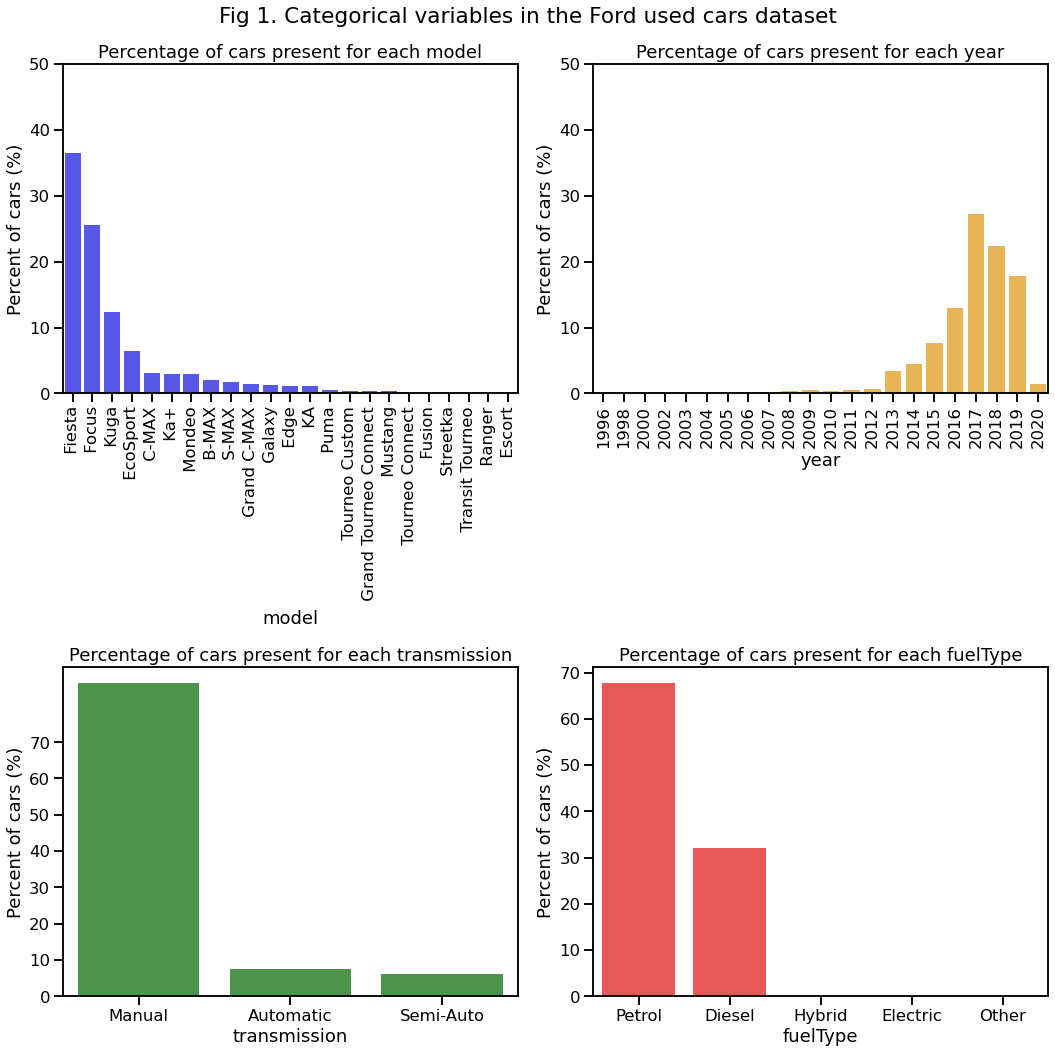

In [7]:
sns.color_palette("Set2")
sns.set_context('talk')
# Here we are setting the layout of the graphs. Other options are 'book', 'paper'

plt.figure(figsize=(15,15))
# Here we are setting the size of the graph. (Width, Length/Height)

# Now we'll create subplots, which means now we can combine multiple graphs and show them together.
# To position them correctly, we'll use rows and columns numbers based on the graphs placements on the figure
# (Number of rows, Number of column, position of the graph)
# In total,there will be 4 graphs in 2 rows and 2 columns.

# Subplot 'model' will be in position 1 (i.e. 1st row, 1st column)
plt.subplot(2,2,1)
# (data, column_x, color, rotation, yticks)
# data = Dataframe = model_count, 
# column_x will have the name of column that will go in x axis; it changes depending of the dataframe since each dataframe has different column name for the column that will go in x axis
# yticks = will be the range/bins/class-intervals of y axis
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# Subplot 'model' will be in position 2 (i.e. 1st row, 2nd column)
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

# Subplot 'model' will be in position 3 (i.e. 2nd row, 1st column)
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

# Subplot 'model' will be in position 4 (i.e. 2nd row, 2nd column)
plt.subplot(2,2,4)
barplot(fueltype_count, 'fuelType', 'red', 0, np.arange(0,71,10))


plt.suptitle("Fig 1. Categorical variables in the Ford used cars dataset")


plt.tight_layout()
# tight_layout helps avoid overlapping of texts among graphs

plt.show()

In Fig 1., first graph shows the percentage distribution of used Ford cars based of the model.
Second graph shows the percentage of used Ford cars per year, from 1996 to 2020.
Third graph shows the three variety of transmissions and the percentage of each found in Ford used cars.
Fourth graph shows the percentage of used Ford cars with fuel types distributed among petrol, diesel, hybrid, electric or others.

**To have a comprehensive understanding of numerical data (price, mileage, mpg and engine size) and their relationship with other numerical data, scatterplot is best suited for the analysis.

1. Changes in price in relation to mileage
2. Changes in price in relation to miles per gallon (mpg)
3. Changes in price in relation to engine size

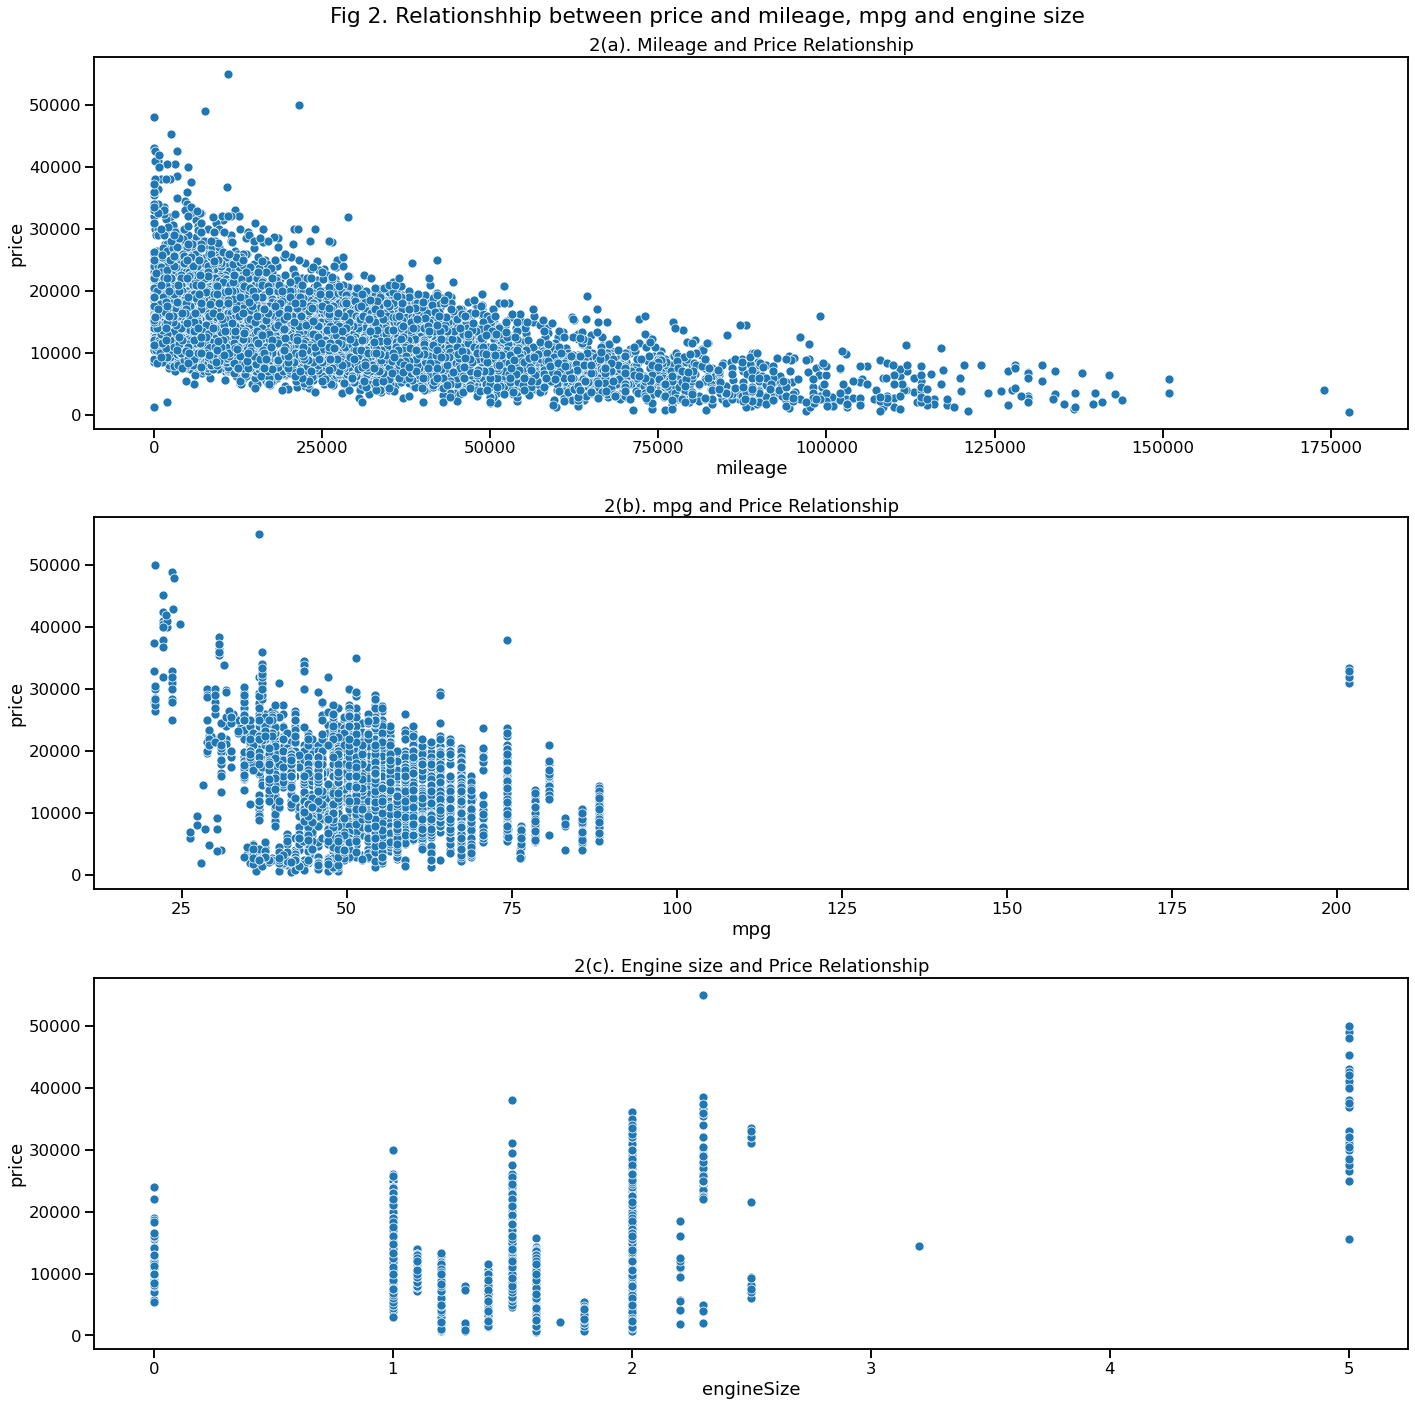

In [8]:

sns.set_context("talk")

plt.figure(figsize=(20,20))
# Here we are setting the size of the graph. (Width, Length/Height)

# creating scatterplot with seaborn
# Subplots: 3 rows, 1 columns, 3 figures (positioned as 1, 2, 3)

plt.subplot(3,1,1) # 1st figure will show relationship of mileage with price (1st row, 1st column)
sns.scatterplot(x='mileage', y='price', data=df)
plt.title("2(a). Mileage and Price Relationship")

plt.subplot(3,1,2) # 2nd figure will show relationship of mpg with price (2nd row, 1st column)
sns.scatterplot(x='mpg', y='price', data=df)
plt.title("2(b). mpg and Price Relationship")

plt.subplot(3,1,3) # 3rd figure will show relationship of engine size with price (3rd row, 1st column)
sns.scatterplot(x='engineSize', y='price', data=df)
plt.title("2(c). Engine size and Price Relationship")

plt.suptitle("Fig 2. Relationshhip between price and mileage, mpg and engine size")

plt.tight_layout()
plt.show()

In Fig 2, 2(a) shows a positively skewed distribution which means price and mileage are inversely propotional to eachother. This will be explained further with regression plot.
2(b) and 2(c) does not show a notable relationship; therefore, both are redundant for analysis.

**Regression Plot (Scatterplot with Trendline)

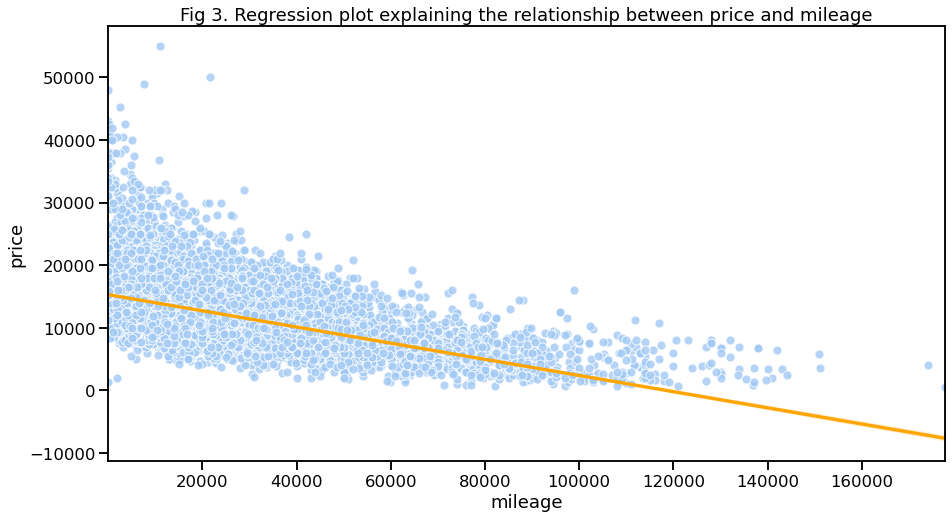

In [9]:
sns.set_palette("pastel")
# changing the color palette of the figures.

plt.figure(figsize=(15,8))


sns.regplot(x='mileage', y='price', data=df, scatter_kws={'edgecolor':'white'},  line_kws={'color':'orange'})

# To see each data point clearly, we can change the edge color by using the dictionary scatter_kws.

plt.title("Fig 3. Regression plot explaining the relationship between price and mileage")
plt.show()


The price, which is an dependent variable, changes with changes in mileage. The trend shows that as mileage increases, the value of the used Ford cars decreases. Provided that, we can observe in Fig 3., at extreme cases of mileage, the price represents a negative value. Such scenerio may be unrealistic but it represents that after certain  mileage, the used Ford cars holds no value.

**Now let's look at the above trend with regard to a categorical data- transmission, Fuel type and models.

1. Changes in price due to changes in mileage, based on transmission types
2. Changes in price due to changes in mileage, based on fuel types
3. Changes in price due to changes in mileage, based on models

In [ ]:
sns.set_palette("bright")
plt.figure(figsize=(20,22))

# Subplots: 3 rows, 1 columns, 3 figures (positioned as 1, 2, 3)
# hue is used to add categorical data into the analysis

plt.subplot(3,1,1) # (1st row, 1st column)
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')
plt.title("Fig 4(a). based on transmission types")

plt.subplot(3,1,2) # (1st row, 2nd column)
sns.scatterplot(x='mileage', y='price', data=df, hue='fuelType')
plt.title("Fig 4(b). Based on fuel types")

plt.subplot(3,1,3) # (1st row, 3rd column)
sns.scatterplot(x='mileage', y='price', data=df, hue='model')
plt.title("Fig 4(c). Based on car models")

plt.suptitle("Fig 4. Changes in price due to changes in mileage, based on different categorical variables")

plt.tight_layout()
plt.show()

C:\Users\M.A\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


The Fig.4 does not show noteworthy relationship. There's a similarity in pattern/trend among all the categorical variables. However, Fig 4(c) uses many categories which makes the graph abstruse.

**Histograms

In [ ]:
# Creating a histogram

sns.set_palette("muted")
plt.figure(figsize=(18,10))

sns.histplot(data=df, x='price', binwidth=2500, kde=True, hue='fuelType')
plt.xlabel("Price")
plt.ylabel("Number of Observations")

plt.title("Fig 5. Price distribution among different types of fuel")
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

In [ ]:
display(fueltype_count)

Fig 5. shows the number of observations in-terms of price, based on different types of fuels. Only Petrol and Diesel type of fuel is observed in the histogram, this is because there are very few observations of Hybrid (22), Electric (2) and Other (1) types, commensurate to Petrol and Diesel. 
Additionally, we can understand that most of the used Ford cars were sold for approximately 10,000. 
The descriptive statistics table corraborates the last statement, as the price ranges between 8999 and 15299, and accounts for 50% of the observations.

**ECDF (Empirical Cumulative Distribution Function) 

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='price', binwidth=250, cumulative=True, stat='probability')
plt.grid()
plt.title("Fig 6. ECDF of Price")
plt.show()

Fig 6. represents the empiricial cumulative distribution of price of used Ford cars. The graphs shows us the probablity of occurence of price at a given point. For example, the probablity of the price being less than $10,000 is appriximately 0.4. 